In [1]:
import os
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import numpy as np

from char_map import get_all_pixels, get_coords

In [2]:
# Make entire array visible when printing data
# np.set_printoptions(threshold=np.nan)

# Open the keyboard image for later use
keyboard = Image.open(
    'obj/keyboard.png'
)

In [35]:
def get_frequencies(freq_dict):
    """Get the frequencies of certain keypresses."""
    pixels = {}
    heatmap_data = np.asarray([[0] * 57] * 21).astype('float')
    # Get the pixels covered by each character, and append these to pixels
    for char in freq_dict:
        coords = get_coords(char)
        if coords:
            for x, y in coords:
                heatmap_data[x][y] = freq_dict[char]
    
    # Return the normalised array    
    return np.sqrt(np.sqrt(heatmap_data)) / np.sum(np.sqrt(np.sqrt(heatmap_data)))

In [36]:
get_frequencies({'y':0.3, '\n':0.2, 'w':0.4})

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
def blend_and_save(freq_dict, filename, colormap='viridis', dots=600):
    """Plot a heatmap, upscale it to the keyboard and save a blended image."""
    print('Generating heatmap...')
    # Clear the heatmap plot and axes
    plt.clf()
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    # Display the data on the heatmap
    heatmap_data = get_frequencies(freq_dict)
    
    plt.imshow(
        heatmap_data, interpolation='lanczos', zorder=1, cmap=colormap
    )
    # Save the heatmap plot
    plt.savefig(
        'obj/heatmap.png',
        dpi=dots,
        pad_inches=0,
        transparent=True,
        bbox_inches='tight'
    )
    print('Blending and saving image...')
    # Open the heatmap image
    heatmap = Image.open(
        'obj/heatmap.png'
    )
    # Resize the heatmap to the keyboard's size, with antialiasing
    heatmap = heatmap.resize(keyboard.size, Image.ANTIALIAS)
    heatmap.save(
        'obj/heatmap.png'
    )
    # Blend the images, and save
    blended = ImageChops.darker(keyboard, heatmap)
    blended.save(
        '{0}/{1}'.format(os.getcwd(), filename)
    )

Generating heatmap...
Blending and saving image...


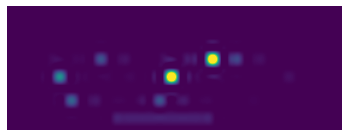

In [116]:
name = 'T_'
d = {
    ' ': 1.1726761e-05,
     'a': 0.0064346143,
     'b': 0.00041932668,
     'c': 1.922815e-09,
     'd': 3.8843857e-09,
     'e': 0.00039748315,
     'f': 7.4425412e-09,
     'g': 5.154145e-10,
     'h': 0.51542866,
     'i': 0.4760194,
     'j': 5.7790835e-08,
     'k': 1.4587388e-08,
     'l': 9.575638e-14,
     'm': 6.4864625e-09,
     'n': 1.9883814e-06,
     'o': 0.00025525942,
     'p': 3.0378982e-07,
     'q': 6.8313305e-08,
     'r': 5.636214e-07,
     's': 8.272295e-09,
     't': 1.6422483e-12,
     'u': 3.921075e-06,
     'v': 1.8336871e-07,
     'w': 1.4197276e-08,
     'x': 1.2661507e-06,
     'y': 3.7678174e-07,
     'z': 0.0010245548,
     '"': 2.2296327e-07,
     '.': 1.388941e-09
}

blend_and_save(
    d,
    f'Tapmaps/thorsten/{name}.png'
)

In [119]:
ord(' '), ord('_'), ord('.'), 

(32, 95, 46)

In [128]:
str.rjust('2', 2, '0')

'02'